In [10]:
# 線形回帰(Linear Regression)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
learn_X = pd.read_csv('../data/treated/use/learn_X.csv')
learn_y = pd.read_csv('../data/treated/use/learn_y.csv')
test_X = pd.read_csv('../data/treated/use/test_X.csv')
test_y = pd.read_csv('../data/treated/use/test_y.csv')

In [12]:
learn_X.drop(columns=['process_end_time', 'final_mes_time'], inplace=True)
test_X.drop(columns=['process_end_time', 'final_mes_time'], inplace=True)
learn_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83
0,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
1,22.45,9.40,803.80,0.68,0.15,0.08,56.11,5.27,33.98,0.96,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
2,22.03,1.14,594.52,0.64,0.14,0.08,51.57,6.15,10.44,0.94,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
3,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
4,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(learn_X, learn_y)

pred = lin_reg.predict(test_X)


#RMSEの表示
print("RMSE:")
np.sqrt(mean_squared_error(test_y, pred))

RMSE:


np.float64(10222.812210856999)

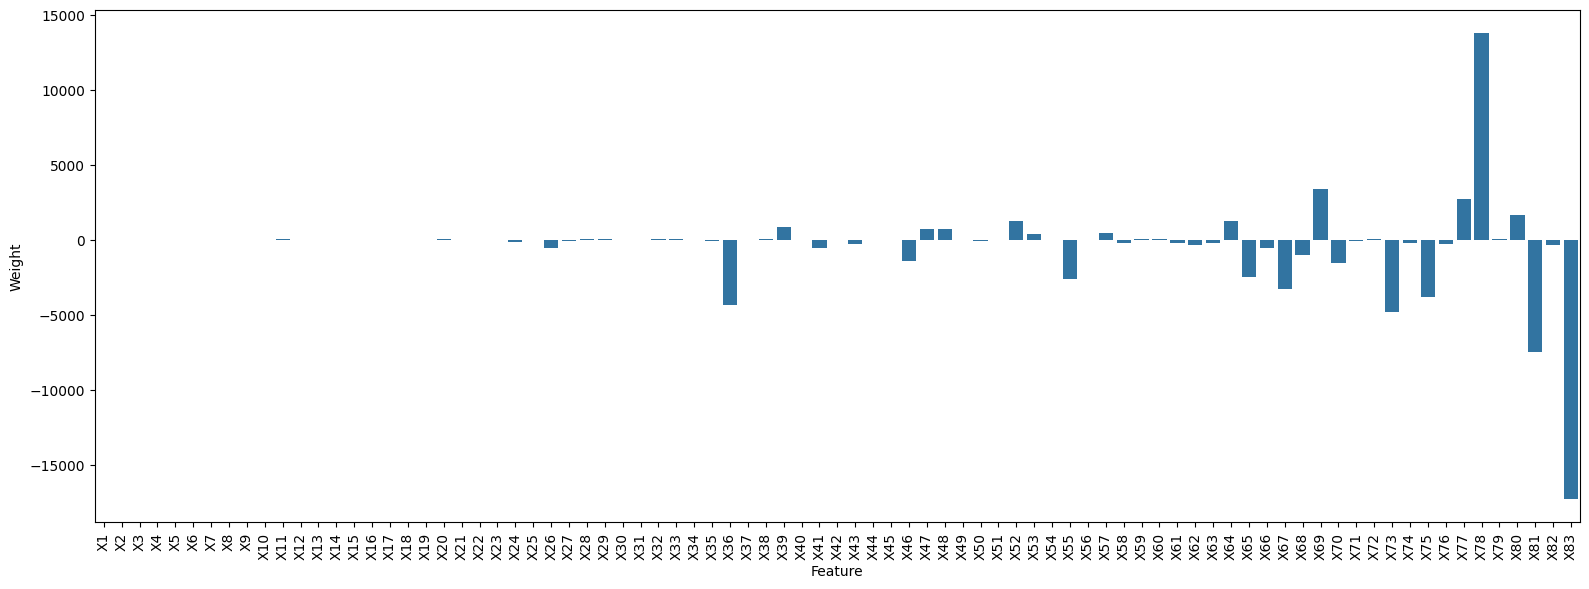


切片 (intercept):
[3288.14448244]


In [20]:
# 回帰係数（重み）を図で表示
plt.figure(figsize=(16,6))
coef = lin_reg.coef_.flatten() if lin_reg.coef_.ndim > 1 else lin_reg.coef_
sns.barplot(x=learn_X.columns, y=coef)
plt.xticks(rotation=90)

plt.ylabel("Weight")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

# 切片もテキストで表示
print("\n切片 (intercept):")
print(lin_reg.intercept_)

上位3個の特徴量: ['X83', 'X78', 'X81']
RMSE (上位3特徴量のみ):
94.16393933920274


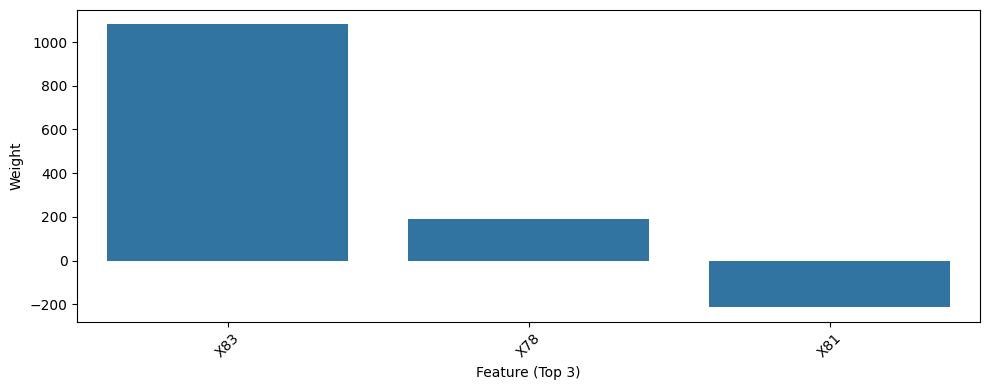

In [27]:
# coefの絶対値が大きい上位10個の特徴量を取得
top_3_idx = np.argsort(np.abs(coef))[-3:][::-1]
top_3_features = learn_X.columns[top_3_idx].tolist()

print("上位3個の特徴量:", top_3_features)

# それらの特徴量のみで再度学習と評価
learn_X_top3 = learn_X[top_3_features]
test_X_top3 = test_X[top_3_features]

lin_reg_top3 = LinearRegression()
lin_reg_top3.fit(learn_X_top3, learn_y)
pred_top3 = lin_reg_top3.predict(test_X_top3)

print("RMSE (上位3特徴量のみ):")
print(np.sqrt(mean_squared_error(test_y, pred_top3)))

# 回帰係数の可視化
plt.figure(figsize=(10,4))
coef_top3 = lin_reg_top3.coef_.flatten() if lin_reg_top3.coef_.ndim > 1 else lin_reg_top3.coef_
sns.barplot(x=top_3_features, y=coef_top3)
plt.xticks(rotation=45)
plt.ylabel("Weight")
plt.xlabel("Feature (Top 3)")
plt.tight_layout()
plt.show()

最初に選択される特徴量: X33 (RMSE: 73.7688)
追加: X30 -> RMSE: 65.5890
追加: X25^2 -> RMSE: 57.9826
追加: X26^2 -> RMSE: 52.1874
追加: X64 -> RMSE: 50.2262
追加: X67 -> RMSE: 44.9795
追加: X7 -> RMSE: 43.8934
追加: X34^2 -> RMSE: 42.7252
追加: X39 -> RMSE: 41.5128
追加: X15^2 -> RMSE: 41.1535
追加: X71 -> RMSE: 41.0275
追加: X48^2 -> RMSE: 40.7813
追加: X21 -> RMSE: 40.6858
追加: X16 -> RMSE: 40.5020
追加: X43 -> RMSE: 40.4681
これ以上改善しないので停止。

選択された特徴量（順番）: ['X33', 'X30', 'X25^2', 'X26^2', 'X64', 'X67', 'X7', 'X34^2', 'X39', 'X15^2', 'X71', 'X48^2', 'X21', 'X16', 'X43']
各ステップのRMSE: [np.float64(73.76882634651098), np.float64(65.58903931914251), np.float64(57.98261910074478), np.float64(52.18742016741987), np.float64(50.22622545358253), np.float64(44.9795243316194), np.float64(43.893362746618195), np.float64(42.725175363812895), np.float64(41.5128302978226), np.float64(41.15347072659522), np.float64(41.027507905528594), np.float64(40.781279543645454), np.float64(40.685797680197915), np.float64(40.50201879315373), np.float64(40

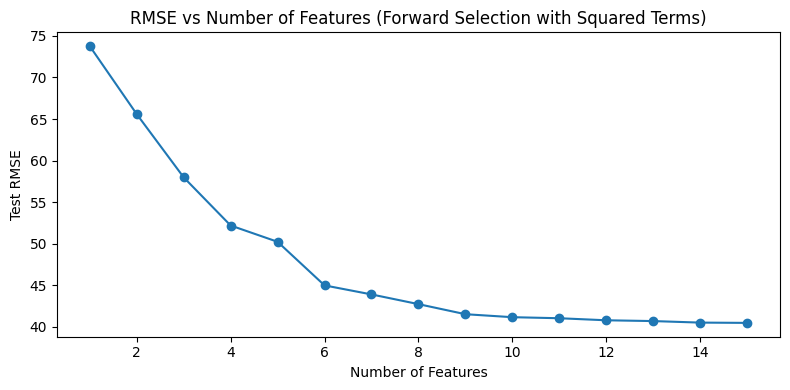

In [35]:
# まず各特徴量の二乗項を導入してみて、もともとの特徴量と二乗特徴量のうち、単回帰のRMSEが最も良いものからスタートし、その後変数や二乗項を拡張しながら特徴選択を行う

from copy import deepcopy

# 元の特徴量名リスト
original_feature_names = list(learn_X.columns)


# 各特徴量の二乗項も作成
learn_X_squared = learn_X.copy()
test_X_squared = test_X.copy()
squared_feature_names = []

for f in original_feature_names:
    colname = f"{f}^2"
    learn_X_squared[colname] = learn_X[f] ** 2
    test_X_squared[colname] = test_X[f] ** 2
    squared_feature_names.append(colname)

# 単回帰で全変数（元+二乗）ごとにRMSEを計算し、最も良いものからスタート
all_feature_names = original_feature_names + squared_feature_names

best_start_rmse = float('inf')
best_start_feature = None

for f in all_feature_names:
    X_train_sub = learn_X_squared[[f]]
    X_test_sub = test_X_squared[[f]]
    lr = LinearRegression()
    lr.fit(X_train_sub, learn_y)
    pred = lr.predict(X_test_sub)
    rmse = np.sqrt(mean_squared_error(test_y, pred))
    if rmse < best_start_rmse:
        best_start_rmse = rmse
        best_start_feature = f

print(f"最初に選択される特徴量: {best_start_feature} (RMSE: {best_start_rmse:.4f})")

# 順前進型で特徴量・二乗項を1つずつ追加していく
best_rmse = best_start_rmse
used_features = [best_start_feature]
unused_features = set(all_feature_names) - set(used_features)
feature_order = [best_start_feature]
rmse_history = [best_start_rmse]

for _ in range(len(all_feature_names)-1):
    best_candidate = None
    best_candidate_rmse = float('inf')

    # まだ使ってない特徴量/二乗項を1つずつ足してみる
    for f in unused_features:
        candidate_features = used_features + [f]
        X_train_sub = learn_X_squared[candidate_features]
        X_test_sub = test_X_squared[candidate_features]
        lr = LinearRegression()
        lr.fit(X_train_sub, learn_y)
        pred = lr.predict(X_test_sub)
        rmse = np.sqrt(mean_squared_error(test_y, pred))
        if rmse < best_candidate_rmse:
            best_candidate_rmse = rmse
            best_candidate = f

    # 前ステップより改善しなければ終了
    if best_candidate_rmse < best_rmse:
        best_rmse = best_candidate_rmse
        used_features.append(best_candidate)
        unused_features.remove(best_candidate)
        feature_order.append(best_candidate)
        rmse_history.append(best_rmse)
        print(f"追加: {best_candidate} -> RMSE: {best_rmse:.4f}")
    else:
        print(f"これ以上改善しないので停止。")
        break

print(f"\n選択された特徴量（順番）: {feature_order}")
print(f"各ステップのRMSE: {rmse_history}")

# 最終モデルの可視化
plt.figure(figsize=(8,4))
plt.plot(range(1, len(rmse_history)+1), rmse_history, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Test RMSE")
plt.title("RMSE vs Number of Features (Forward Selection with Squared Terms)")
plt.tight_layout()
plt.show()


In [32]:
print("選ばれたモデルの特徴量は:", feature_order)


選ばれたモデルの特徴量は: ['X33', 'X30', 'X25', 'X28', 'X64', 'X8', 'X39', 'X14', 'X29', 'X17', 'X55', 'X71', 'X35', 'X48', 'X63', 'X9', 'X44']
